# Prediciting heart disease using Machine Learning

* Thise notebooj looks into using various Python-basesd machine learning & data science libraries in an attempt to build a machine learning model capable of predicting heart disease based on medical atributes

**We are going to take the following approcah**
1. Problem defination
2. data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).


Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation
1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [125]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from sckit learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics

## Load Data


In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape  #(rows,columns)

(303, 14)

# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# how many each class is there
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

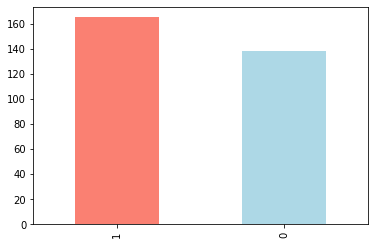

In [7]:
# let's visualize
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Let's explore by comparing different features/column to get insight of data

In [11]:
# according to data dictionary <sex - (1 = male; 0 = female)>
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


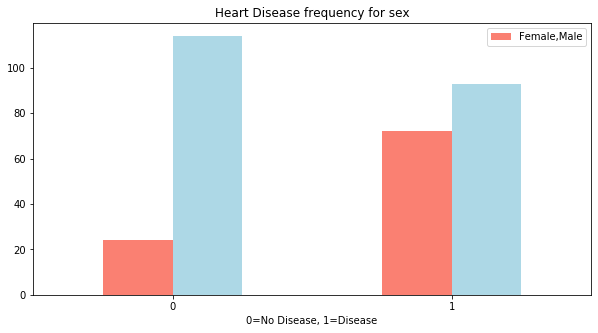

In [13]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,5),color=['salmon','lightblue'])
plt.title('Heart Disease frequency for sex')
plt.xlabel('0=No Disease, 1=Disease')
plt.legend(['Female,Male']);
plt.xticks(rotation=0);# look at the rotation of 0 and 1 at xlabel



In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


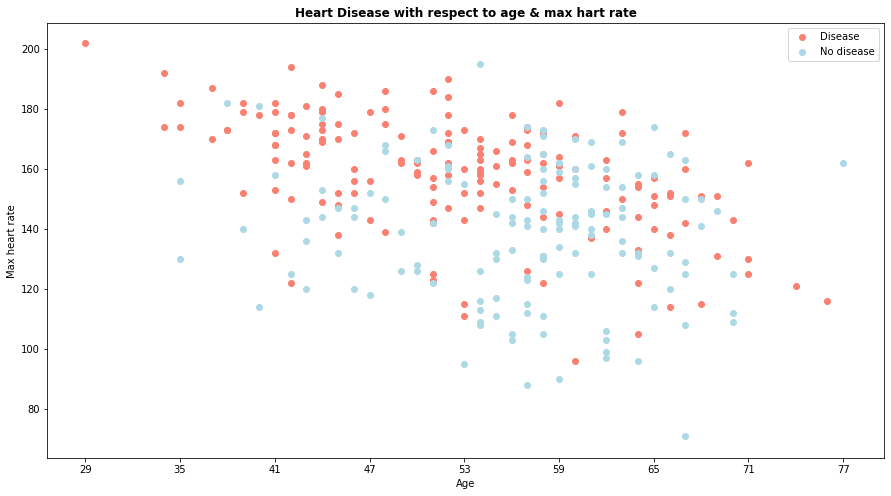

In [15]:
#Positive
plt.figure(figsize=(15,8))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],c='salmon')
#Negative
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],c='lightblue');
#customize
plt.title('Heart Disease with respect to age & max hart rate', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','No disease']);
plt.xticks(np.arange(min(df.age), max(df.age)+1, 6.0)); # stepping


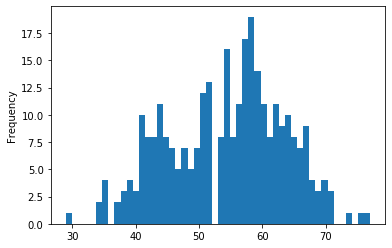

In [16]:
# Checking the distribution
df.age.plot.hist(bins=50);

## Heart disese with chest pain
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease


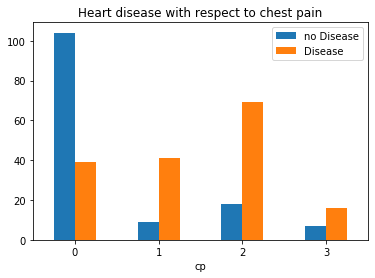

In [17]:
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.legend(['no Disease','Disease'])
plt.xticks(rotation=0)
plt.title('Heart disease with respect to chest pain');


3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

## Correlation MAtrix

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

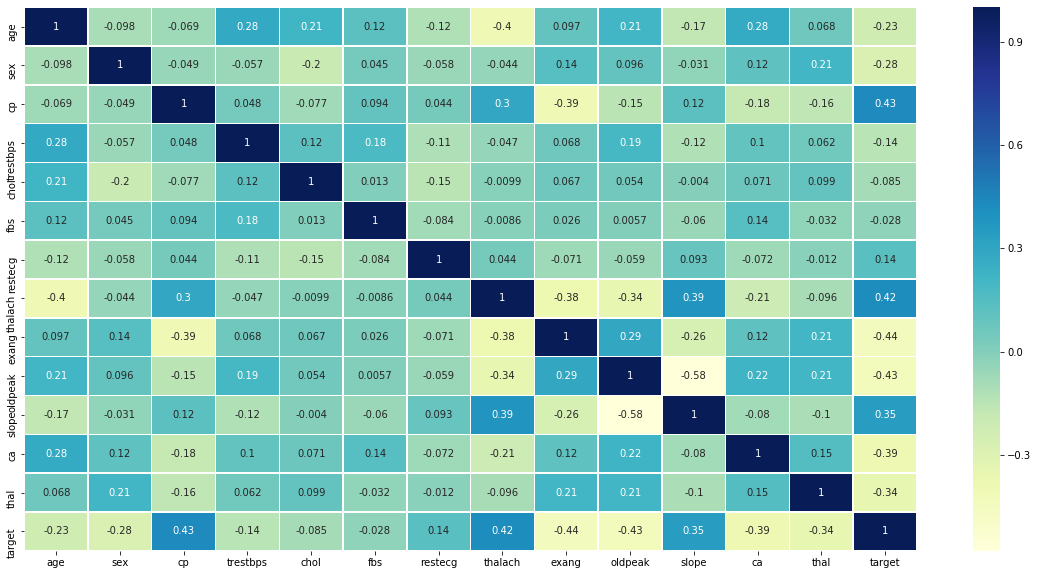

In [19]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),
            annot=True,
             fmt='.2g',
          cmap="YlGnBu", 
           linewidth=0.5);
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)#adjusting not needed if updated matplotlib

              

### Understanding Corelation matrix
source https://statisticsbyjim.com/basics/correlations/
 go to the site and read

**key concept**
* “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

* A correlation between variables indicates that as one variable changes in value, the other variable tends to change in a specific direction.  Understanding that relationship is useful because we can use the value of one variable to predict the value of the other variable. For example, height and weight are correlated—as height increases, weight also tends to increase. Consequently, if we observe an individual who is unusually tall, we can predict that his weight is also above the average.

* In statistics, a correlation coefficient is a quantitative assessment that measures both the direction and the strength of this tendency to vary together. There are different types of correlation that you can use for different kinds of data. In this post, I cover the most common type of correlation—Pearson’s correlation coefficient.

* Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.


* **Direction: The sign of the correlation coefficient represents the direction of the relationship.
Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope**.

* Examples of Positive and Negative Correlation Coefficients
An example of a positive correlation is the relationship between the speed of a wind turbine and the amount of energy it produces. As the turbine speed increases, electricity production also increases.

* An example of a negative correlation is the relationship between outdoor temperature and heating costs. As the temperature increases, heating costs decrease.





## Time to Model our problem

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
np.random.seed(42)
X = df.drop('target',axis=1)
y = df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [24]:
# Putting model n dict
model_dict = {'Logistic Regression':LogisticRegression(),
             'KNN': KNeighborsClassifier(),
             'Random Forest':RandomForestClassifier()}

# creating function to fit and score

def fit_and_score(model_dict,X_train,X_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    np.random.seed(42)
    
    models_scores = {}
    
    for name,model in model_dict.items():  # for dict its need to do this wasy so all will be accesible
        model.fit(X_train,y_train)
        models_scores[name] = model.score(X_test,y_test) # can't use append bcz it's dict 
                      
    return models_scores   
    


 


In [25]:
model_scores = fit_and_score(model_dict,X_train,X_test,y_train,y_test)
print(model_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.8688524590163934, 'KNN': 0.6885245901639344, 'Random Forest': 0.8524590163934426}


In [26]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.868852,0.688525,0.852459


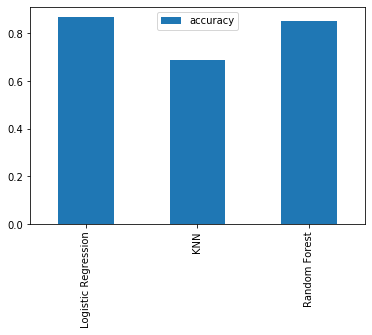

In [27]:
model_compare.T.plot.bar();


Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [28]:
# lets test KNN by hand

train_score = []
test_score = []

neighbors = range(1,21,1)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))
              
print (f'max test KNN score {max(test_score)*100:.2f}% ')

max test KNN score 75.41% 


In [29]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

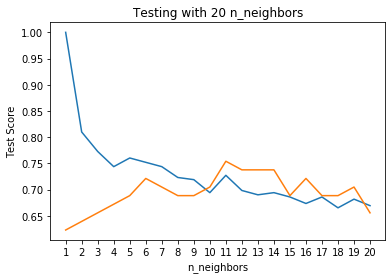

In [30]:
plt.plot(neighbors,train_score)
plt.plot(neighbors,test_score)
plt.xlabel('n_neighbors')
plt.ylabel('Test Score')
plt.title('Testing with 20 n_neighbors')
plt.xticks(np.arange(1,21,1));

**Let's discard KNN**

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [31]:
print(RandomForestClassifier().get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [32]:
# grid for LOgistics REgression
log_reg_grid = {'C':np.logspace(-4, 4, 30),
                'solver':['lbfgs', 'liblinear'] }   

# Grid for Random forest
rf_grid = {'n_estimators':np.arange(10,1000,10),
            'max_depth': [None,5,10,15,20],
             'max_features':['auto','sqrt'],
              'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,3)}  


In [33]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs fail

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+0

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 117.21022975334793}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

In [36]:
# now for Random forest
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,n_iter=20,
                               verbose=2)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=920, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=550, min_samples_split=14, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=550, min_samples_split=14, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.5s
[CV] n_estimators=550, min_samples_split=14, min_s

[CV]  n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=290, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=210, min_samples

[CV]  n_estimators=720, min_samples_split=12, min_samples_leaf=13, max_features=sqrt, max_depth=20, total=   0.7s
[CV] n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5 
[CV]  n_estimators=850, min_samples_split=18, min_samples_leaf=10, max_features=auto, max_depth=5, total=   0.9s
[CV] n_estimators=850, min_samples_split=1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [37]:
rs_rf.best_params_

{'n_estimators': 920,
 'min_samples_split': 18,
 'min_samples_leaf': 13,
 'max_features': 'auto',
 'max_depth': 20}

In [38]:
rs_rf.score(X_test,y_test)


0.8688524590163934

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [82]:
np.random.seed(40)
log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                     param_grid=log_reg_grid,
                            cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)
                     

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [83]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [84]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## testing


In [86]:
y_preds = gs_log_reg.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

(2.0, 0.0)

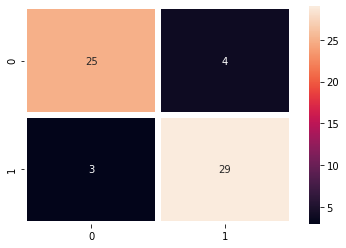

In [103]:
fig,ax = plt.subplots()
sns.font
ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,linewidths=5)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-.5)

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [104]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [105]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

**hard way of ploting roc curve**

In [120]:

y_preds = gs_log_reg.predict_proba(X_test)
y_positive = y_preds[:,1]
y_positive
fpr, tpr, thresholds = roc_curve(y_test,y_positive)


No handles with labels found to put in legend.


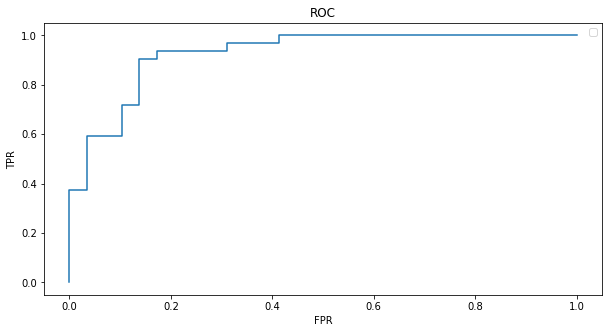

In [124]:
fig,ax = plt.subplots(figsize=(10,5))
ax = plt.plot(fpr,tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()



**Easy way of ploting roc curve**

need to update anaconda to use this

In [133]:
metrics.auc(fpr,tpr)


0.925646551724138

## confusion metrix

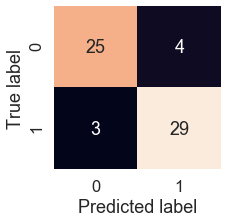

In [141]:

sns.set(font_scale=1.5)
y_preds = gs_log_reg.predict(X_test)
def plot_conf_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom+.5,top-.5)
    
plot_conf_matrix(y_test,y_preds)
    

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [144]:
print(classification_report(y_test,y_preds)) # this y_preds data is only for X_test data. not crossvalidated

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [146]:
25/(25+3)

0.8928571428571429

In [148]:
25/(29)

0.8620689655172413

### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [151]:
# checking best hyper parameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [162]:
np.random.seed(42)
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')


In [169]:
cv_accuracy = np.mean(cross_val_score(clf,X,y,
               cv=5,
               scoring='accuracy'))
cv_accuracy

0.8479781420765027

In [175]:
cv_precision = np.mean(cross_val_score(clf,X,y,
               cv=5,
               scoring='precision'))
cv_precision

0.8215873015873015

In [177]:
cv_recall = np.mean(cross_val_score(clf,X,y,
               cv=5,
               scoring='recall'))
cv_recall

0.9272727272727274

In [176]:
cv_f1 = np.mean(cross_val_score(clf,X,y,
               cv=5,
               scoring='f1'))
cv_f1

0.8705403543192143

In [181]:
cv_score = pd.DataFrame({'Accuracy':cv_acc,
                          'Precesion':cv_precision,
                          'Recall': cv_recall,
                          'f1 Score':cv_f1},index=['Score'])
cv_score

,Accuracy,Precesion,Recall,f1 Score
Score,0.821587,0.821587,0.927273,0.87054


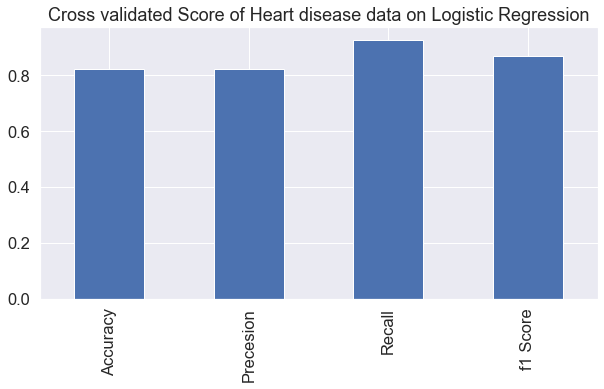

In [189]:
cv_score.T.plot(kind='bar',legend=False,title='Cross validated Score of Heart disease data on Logistic Regression',figsize=(10,5));

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [191]:
np.random.seed(42)
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [192]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [199]:
#check coef_
a = clf.coef_
a.shape

(1, 13)

In [200]:
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [205]:
# MAtch coef_ of features to column
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

In [207]:
# Let's visualize
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.660671,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


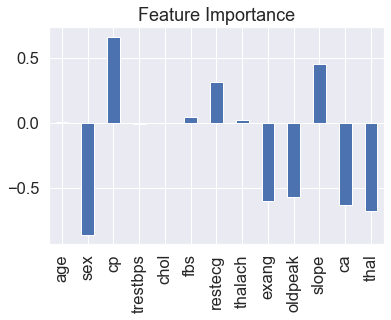

In [210]:
feature_df.T.plot.bar(title='Feature Importance',legend=False); 

(14.0, 0.0)

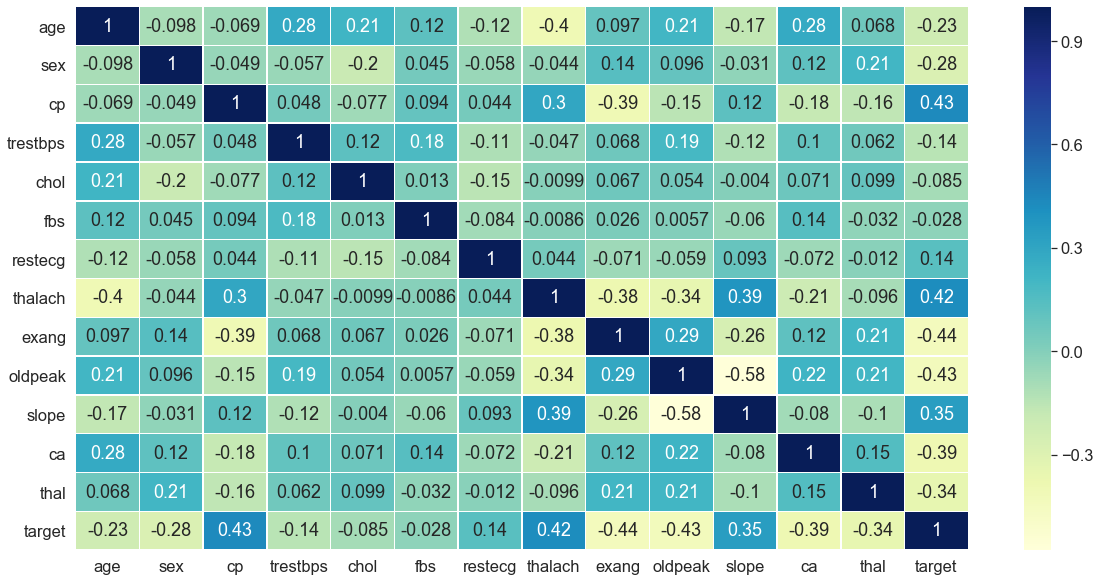

In [211]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),
            annot=True,
             fmt='.2g',
          cmap="YlGnBu", 
           linewidth=0.5);
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)#adjusting not needed if updated matplotlib

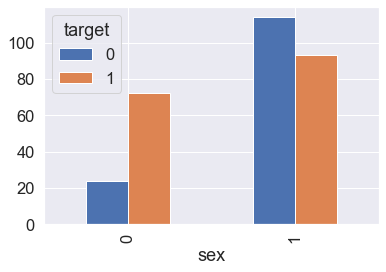

In [219]:
pd.crosstab(df['sex'],df.target).plot.bar();

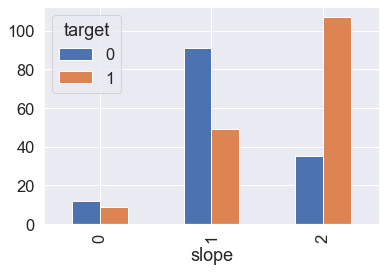

In [218]:
pd.crosstab(df.slope,df.target).plot.bar()

In [232]:
import pickle
pickle.dump(clf,open('heart-disease-prediction.pkl','wb'))


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

In [234]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [239]:
np.array(df[:2])

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ,   1. ]])